/Volumes/SSD_01/00_Python課程專用/PythonAI_Web_20231217/D91_書籍範例/02_Python:加密貨幣CTA量化交易111個實戰技巧/範例程式碼_20231218/historical_data.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old_ts = file_data.iloc[-1][0]
/var/folders/vm/_zft15050r7cfh47y6v5z4k40000gn/T/ipykernel_46198/3758932953.py:40: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  self.data["position"].fillna(method="ffill", inplace=True)


總績效(來回成本0.001):3.8146
交易次數:61
平均績效(來回成本0.001):0.0625
勝率:0.6721
賺賠比:2.122
賠率:4.35
期望值:1.0984
獲勝持有時間:16 days 14:49:45.365853658
虧損持有時間:17 days 04:48:00
MDD:0.2733


/Users/samhsiao/Documents/PythonVenv/envDash/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 21407 (\N{CJK UNIFIED IDEOGRAPH-539F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/samhsiao/Documents/PythonVenv/envDash/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 22987 (\N{CJK UNIFIED IDEOGRAPH-59CB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/samhsiao/Documents/PythonVenv/envDash/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 22577 (\N{CJK UNIFIED IDEOGRAPH-5831}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/samhsiao/Documents/PythonVenv/envDash/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 37228 (\N{CJK UNIFIED IDEOGRAPH-916C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/samhsiao/Documents/PythonVenv/envDash/lib/python3.10/site-pac

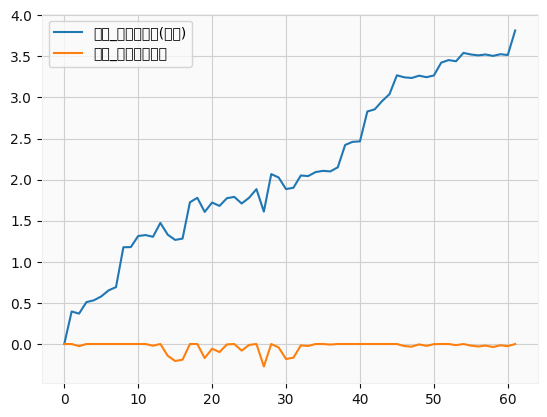

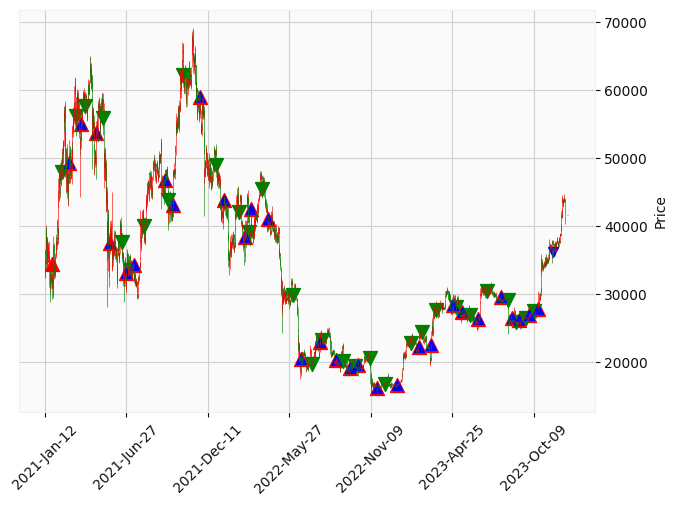

In [8]:
from backtest_class import Backtest
from talib.abstract import MACD


def run_strategy(
    self,
):
    self.data["position"] = None
    self.data[["macd", "macdsignal", "macdhist"]] = MACD(
        self.data, fastperiod=15, slowperiod=26, signalperiod=7
    )
    乖離率大於0 = self.data["macdhist"] > 0
    長短價差小於0 = self.data["macdsignal"] < 0
    乖離率小於0 = self.data["macdhist"] < 0
    長短價差大於0 = self.data["macdsignal"] > 0
    # 乖離率大於0連續 = 乖離率大於0.rolling(2).sum() == 2
    # 乖離率小於0連續 = 乖離率小於0.rolling(2).sum() == 2
    # 長短價差小於0連續 = 長短價差小於0.rolling(2).sum() == 2
    # 長短價差大於0連續 = 長短價差大於0.rolling(2).sum() == 2
    # 最低小最高平均 = self.data['low'] < self.data['high'].rolling(8).mean().shift(2) # 2
    # 最高大最低平均 = self.data['high'] > self.data['low'].rolling(8).mean().shift(2) # 2

    # 最低大最高平均 = self.data['low'] > self.data['high'].rolling(4).mean().shift(2) # 2
    # 最高小最低平均 = self.data['high'] < self.data['low'].rolling(4).mean().shift(2) # 2

    最低大於過去最高 = self.data["low"] > self.data["high"].shift(2)  # 1
    最高小於過去最低 = self.data["high"] < self.data["low"].shift(2)  # 1

    # 最低大於過去最高連續 = 最低大於過去最高.rolling(2).sum()==2
    # 最高小於過去最低連續 = 最高小於過去最低.rolling(2).sum()==2

    # 收盤大於過去最高 = self.data['close'] > self.data['high'].shift(1)  # 1
    # 收盤小於過去最低 = self.data['close'] < self.data['low'].shift(1)  # 1

    多單 = 乖離率大於0 & 長短價差小於0 & 最低大於過去最高
    空單 = 乖離率小於0 & 長短價差大於0 & 最高小於過去最低

    self.data.loc[多單, "position"] = 1
    self.data.loc[空單, "position"] = -1
    self.data["position"].fillna(method="ffill", inplace=True)


symbol = "BTCBUSD"
interval = "8h"
Backtest.run_strategy = run_strategy
backtest = Backtest(symbol, interval)
backtest.run_strategy()
backtest.performance()
backtest.equity_curve("原始")
backtest.plot_order()
# backtest.trade_info.to_csv('a.csv')
